# Nombre : Josue Alejandro Sauca Pucha
# Fecha : 30-06-2023

# Práctica de laboratorio 8: Clasificación del árbol de decisiones
En esta práctica de laboratorio utilizará un modelo clasificador de árbol de decisiones para determinar quiénes sobrevivieron al desastre del crucero Titanic.

    ** Parte 1: Crear un clasificador de árbol de decisiones **
    ** Parte 2: Aplicar el modelo del árbol de decisiones **
    ** Parte 3: Evaluar el modelo del árbol de decisiones **
# Aspectos básicos/situación
En esta práctica de laboratorio creará un clasificador de árbol de decisiones que funcione con un conjunto de datos que contenga detalles sobre los más de 1300 pasajeros que estaban a bordo del trasatlántico Titanic durante su trágico primer viaje.

# Recursos necesarios
    * 1 PC con acceso a Internet
    * Bibliotecas de Python: pandas, sklearn y IPython.display
    * Aplicación adicional: Graphviz
    * Archivos de datos: titanic-train.csv, titanic-test.csv, titanic_all.csv
    
# Parte 1: Crear un clasificador de árbol de decisiones
En esta práctica de laboratorio creará un clasificador de árbol de decisiones que captará información de un conjunto de datos rotulado.

El conjunto de datos contiene los nombres y los datos demográficos de todos los pasajeros. Además, se incluyen los detalles de viaje de los pasajeros. De estos datos, podemos crear un árbol de decisiones que ilustre los factores que contribuyeron a la supervivencia, o a la falta de ella, en el viaje.

Los conjuntos de datos contienen las siguientes variables:

**Variable	Descripción**
1. PassengerID	Identificación única para todos los pasajeros
2. Survival	¿El pasajero sobrevivió? (0 = No; 1 = Sí)
3. Pclass	Clase de ticket del pasajero. (1 = 1º; 2 = 2º; 3 = 3º)
4. Nombre	Nombre del pasajero. (apellido, nombre)
5. Género	Male o female
6. Edad	Edad en años. Principalmente números enteros con valores flotantes para niños menores de un año.
7. SibSp	Cantidad de hermanos o cónyuge a bordo.
8. Parch	Cantidad de padres o niños a bordo.
9. Ticket	Número de ticket
10. Fare	La tarifa abonada por ticket en libras esterlinas antes de 1970
11. Cabin	Número de cabina
12. Embarked	Puerto de embarque (C = Cherbourg; Q= Queenstown; S = Southampton)

Con los datos de arriba, ¿qué tipos de preguntas podemos hacer acerca de los factores que contribuyeron a que los pasajeros sobrevivan o fallecieran en la catástrofe del Titanic?

Se pueden hacer preguntas como:
* ¿Cuál es la edad de las personas fallecidas?
* ¿Cuántos sobrevivientes existen de accidente?
* ¿Cantidad de personas que tenian familiares dentro del avión?
* ¿Los tickets que existian en el avión que se accidento?
* ¿Cuántas personas eran de sexo femenino y masculino?

## Paso 1: Crear la estructura de datos

a) Importe pandas y el archivo csv
Primero, importe pandas y cree una estructura de datos del conjunto de datos de entrenamiento del Titanic, que se encuentra en el archivo titanic-train.csv.titanic-train.csv. Siga el método pd.read_csv()

In [1]:
#Code cell 1
#import pandas
import pandas as pd

#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("./Data/titanic-train.csv")

b) Verifique la importación y analice los datos

In [3]:
#Code cell 2
#verify the contents of the training dataframe using the pandas info() method.
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    object 
 5   Age          738 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


¿Faltan valores en el conjunto de datos?

Como se puede observar si existen valores nulos dentro de las filas Cabin y Age, ya que existen en total 915 y ambas filas no tienen esa cantidad de datos

In [4]:
#Code cell 3
#view the first few rows of the data
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


# Paso 2: Preparar los datos para el modelo de árbol de decisiones
## a) Reemplace los datos de la cadena por etiquetas numéricas
Utilizaremos scikit-learn para crear árboles de decisiones. El modelo del árbol de decisiones que utilizaremos solo puede administrar datos numéricos. Los valores para la variable Gender (Género) se deben transformarse en representaciones numéricas. 0 se utilizará para representar el valor "masculino" y 1 para el valor "femenino".

En este código, se utiliza una expresión lambda con el método de estructura de datos apply(). Esta expresión lambda representa una característica que utiliza una instrucción condicional para reemplazar los valores de texto de las columnas por el valor numérico correspondiente. La instrucción de la lambda se puede interpretar de la siguiente manera: "Si el parámetro toLabel es ‘male’, colocar 0; si el valor es otro, colocar 1". El método apply() ejecutará esta función en los valores de cada fila de la columna "Gender" de la estructura de datos.

In [5]:
#code cell 4
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

## b) Verifique que la variable Gender haya cambiado.
El resultado debe mostrar valores de 0 o 1 para la variable Gender en el conjunto de datos.

In [6]:
#code cell 5
#view the first few rows of the data again
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


## C) Aborde la ausencia de valores en el conjunto de datos
El resultado del método info() que mencionamos más arriba indicó que aproximadamente 180 observaciones no tienen el valor de la edad. El valor de la edad es importante para nuestro análisis. Debemos abordar estos valores faltantes de alguna manera. Si bien no es lo ideal, podemos reemplazar estos valores de edad faltantes por el promedio de edad para todo el conjunto de datos.

Esto se logra mediante la aplicación del método fillna() en la columna "Age" ("Edad") del conjunto de datos. El método fillna() cambiará la estructura de datos original mediante el argumento inplace = True.

In [7]:
#code cell 6
training["Age"].fillna(training["Age"].mean(), inplace=True)

## d) Verifique que se hayan reemplazado los valores.

In [8]:
#code cell 7
#verify that the missing values for the age variable have been eliminated.
#answers may vary
training['Age'].isnull().sum() #Observamos que no existen valores nulos para Age

0

In [9]:
training['Age']

0      31.000000
1      35.000000
2      29.970867
3      49.000000
4      22.000000
         ...    
910    20.000000
911    29.970867
912    27.000000
913    49.000000
914    29.970867
Name: Age, Length: 915, dtype: float64

¿Cuál es el valor que se utilizó para reemplazar a las edades faltantes?

En este caso se utilizo **training["Age"].mean()**, la funcion mean() se obtiene la media de la columna Age, entonces luego de obtener la media de la columna se le asigna a los valores nulos dentro del datase, el valor que se utilizo es de 29.97, pero se lo va a redonder al 29

# Paso 3: Entrenar y calificar el modelo del árbol de decisiones.
## a) Cree un objeto de arreglo con la variable que será el objetivo del modelo.
El propósito del modelo es clasificar a los pasajeros como sobrevivientes o víctimas fatales. El conjunto de datos identifica sobrevivientes y víctimas fatales. El modelo deducirá qué valores variables de entrada tienen más probabilidad de pertenecer a las víctimas fatales y a los sobrevivientes. Luego, usted podrá utilizar dicha información para clasificar pasajeros de un conjunto de datos único de prueba.

In [10]:
#code cell 8
#create the array for the target values
y_target = training["Survived"].values

## b) Cree el arreglo de valores que será la entrada para el modelo.
Solo algunas de las funciones de datos son útiles para crear el árbol clasificador. Creamos una lista de las columnas a partir de los datos que deseamos que el clasificador utilice como variables de entrada y luego creamos un arreglo con el nombre de la columna de esa variable. La variable X_input contiene los valores para todas las funciones que utilizará el modelo para deducir cómo hacer las clasificaciones. Una vez que el modelo esté entrenado, utilizaremos esta variable para asignar estas etiquetas al conjunto de datos de prueba.

In [11]:
#code cell 9
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

## c) Crear el modelo programado.
Importe el módulo del árbol de decisiones desde la biblioteca de aprendizaje automático sklearn. Cree el objeto clasificador clf_train. A continuación, utilice el método fit() del objeto clasificador con la variables X_input e y_target como parámetros para entrenar el modelo.

In [12]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

## d) Evalúe el modelo.
Utilice el método score() del objeto del árbol de decisiones para mostrar la precisión del porcentaje de las asignaciones realizadas por el clasificador. Este método considera las variables de entrada y salida como argumentos.

In [13]:
#code cell 11
clf_train.score(X_input,y_target)

0.8163934426229508

Este valor de calificación indica que las calificaciones realizadas por el modelo deberían ser correctas aproximadamente el 82 % de las veces.

# Paso 6: Visualizar el árbol
## a) Cree el resultado del archivo intermedio.
Importe el módulo sklearn.externals.six StringIO que se utiliza para generar las características del árbol de decisiones en un archivo. Crearemos un archivo dot de Graphviz que nos permitirá exportar los resultados del clasificador en un formato que se puede convertir en gráfico.

In [20]:
#code cell 12
from sklearn.externals.six import StringIO # Como se puede observar no se puede importar dicha libreria

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [41]:
import six
import sys
sys.modules['sklearn.externals.six'] = six #Se tiene que llamar a los modulos del sistema manuelmente para que funcione

In [28]:
#code cell 12
from sklearn.externals.six import StringIO #Comos se puede osbervar ya funciono
with open("./Data/titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

## b) Instale Graphviz.
Para visualizar el árbol de decisiones, Graphviz debe instalarse desde una terminal. La instalación requiere responder una pregunta emergente, lo cual no se puede hacer desde una celda de código de una libreta de anotaciones. Utilice el comando apt-get install graphviz de la línea de comando de la terminal para instalar este software.

## c) Convierta el archivo intermedio en gráfico.
El archivo dot que se creó anteriormente se puede convertir en un archivo .png con el procesador dot de Graphiz. Este es un comando shell, así que utilice ! antes de él para ejecutarlo desde esta libreta de anotaciones. El nuevo archivo de imagen titanic.png deberá aparecer en el directorio que contiene esta libreta de anotaciones.


In [31]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
dot -Tpng Data/titanic.dot -o Data/titanic.png
#Como se puede observar el comando para generar la imagen con Graphiz no funciona pero en la cmd de windows si

SyntaxError: invalid syntax (<ipython-input-31-0ad235098d83>, line 3)

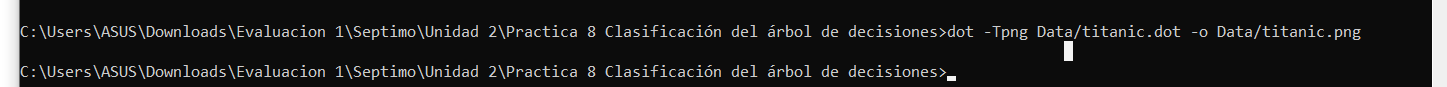

In [52]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('1.png')
display(img) #Como se puede observar el comnado de arriba si funciona a nivel local ya que algunos comandos de windows 
#no funcionan con jupiter porque jupypter tienen su kernel con python

## D) Muestre la imagen.
Ahora importaremos el módulo Image desde la biblioteca IPython.display. Esto permitirá que abramos y visualicemos un archivo gráfico externo en la página de la libreta de anotaciones. La función Image se utiliza para visualizar el archivo, con el del archivo .png como argumento.

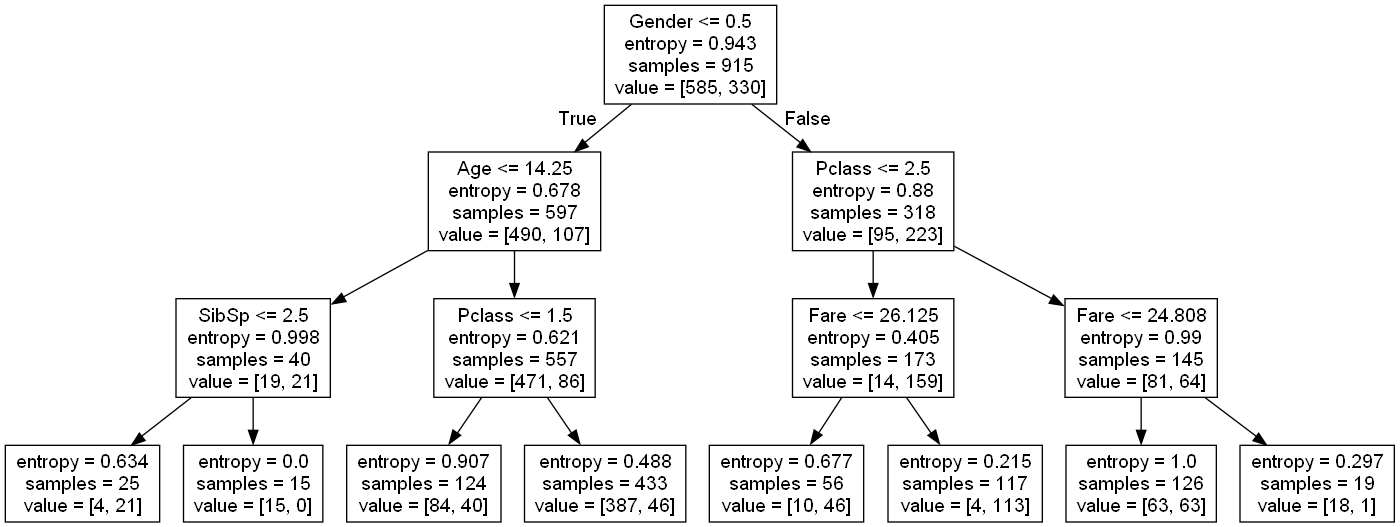

In [35]:
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image

#display the decison tree graphic
Image("./Data/titanic.png")

## e) Interprete el árbol.
En el árbol entrenado, podemos ver varias cosas. Primero, en su raíz, está la variable Gender, que indica que es el único factor más importante al realizar la clasificación. Las ramas hacia la izquierda son para Gender = 0 o masculino. La raíz y cada nodo intermedio contienen el factor de decisión, la entropía y la muestra de pasajeros que cumplen con criterio en ese punto del árbol. Por ejemplo, el nodo raíz indica que hay 915 observaciones que conforman el conjunto de datos de aprendizaje. En el siguiente nivel, podemos ver que 597 personas eran de género masculino y 318 de género femenino. Para la rama femenina del árbol, en el siguiente nivel hacia abajo, podemos ver que de los 318 pasajeros de género femenino, 173 eran pasajeros de primera o segunda clase (Pclass<=2.5000) y 145 eran de tercera clase. Luego, de los 145 pasajeros de género femenino de tercera clase, 126 pagaron una tarifa inferior a 24.8 por su ticket, mientras que 19 pagaron más de ese monto.

Por último, en los nodos de hojas, que están en la fila inferior del árbol, podemos ver valores emparejados entre corchetes que indican el número de víctimas fatales y de sobrevivientes para la clasificación específica de pasajeros. Por ejemplo, para los pasajeros de género femenino de tercera clase que pagaron menos de 24.8, la cantidad de víctimas fatales y sobrevivientes sumaba 63. De esos mismos pasajeros que pagaron más de 24.8, 18 fallecieron y 1 sobrevivió.

La entropía es una medida de ruido en la decisión. El ruido se puede ver como incertidumbre. Por ejemplo, en los nodos en los que la decisión brinda valores iguales en el arreglo de valores de sobrevivientes, la entropía se encuentra en su valor más alto posible, que es 1.0. Esto significa que el modelo no pudo tomar, de forma definitiva, la decisión de clasificación según las variables de entrada. Para los valores de la entropía muy baja, la decisión era mucho más clara, y la diferencia en la cantidad de sobrevivientes y víctimas fatales es mucho mayor.

¿Qué describe al grupo que tenía mayor cantidad de víctimas fatales? ¿Qué grupo tenía la mayor cantidad de sobrevivientes?

* El grupo con mayor cantidad de victimas fatales es el de las mujeres que pagaron boletas mas caros de la primera y segunda clase.
* El grupo que tienen la mayor cantidad de sobrevivientes es el de los hombres que pagaron de mas en la tercera clase 

# Parte 2: Aplicar el modelo del árbol de decisiones
En esta parte de la práctica de laboratorio, usaremos los resultados del modelo del árbol de decisiones programado para etiquetar un conjunto de datos sin etiquetas de pasajeros del Titanic. El árbol de decisiones evaluará las características de cada observación y etiquetará la observación como sobreviviente (etiqueta = 1) o víctima fatal (etiqueta = 0).

# Paso 1: Importar y elaborar los datos
En este paso, importará y preparará los datos para el análisis.

## a) Importe los datos.
Coloque el nombre “prueba” a la estructura de datos e importe el archivo titanic-test.csv.

In [53]:
#code cell 15
#import the file into the 'testing' dataframe.
testing = pd.read_csv("./Data/titanic-test.csv")
testing

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C
2,918,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
388,1304,0,3,"Thomas, Mr. Charles P",male,NaN,1,0,2621,6.4375,NaN,C
389,1305,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C
390,1306,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
391,1307,0,3,"Holthen, Mr. Johan Martin",male,28.0,0,0,C 4001,22.5250,NaN,S


In [54]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived     393 non-null    int64  
 2   Pclass       393 non-null    int64  
 3   Name         393 non-null    object 
 4   Gender       393 non-null    object 
 5   Age          307 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        93 non-null     object 
 11  Embarked     392 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 37.0+ KB


**¿Cuántos registros hay en el conjunto de datos?**

Existen alrededor de 394 registros, en la presentacion de python sale 393 pero es porque cuenta de n-1

**¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?**

Como se puede observar en la informacion del dataset exsiten 12 columnas importantes de las cuales la columan de Age(edad) tiene 307 de 393 datos le faltan 86 datos y Cabin(Cabina) tiene 93 datos de 393 datos le faltan 300 datos

## b) Utilice una expresión lambda para reemplazar los valores “male” y “female” por 0 para masculino y 1 para femenino.

In [39]:
#code cell 16
#replace the Gender labels in the testing dataframe
testing["Gender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

## c) Reemplace los valores de edad faltantes por el promedio de las edades.

In [40]:
#code cell 17
#Use the fillna method of the testing dataframe column "Age" 
#to replace missing values with the mean of the age values.
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

## d) Verifique que se hayan reemplazado los valores.
Verifique que se hayan completado los valores faltantes y que las etiquetas de Gender sean 0 y 1.

In [42]:
#code cell 18
#verify the data preparation steps. Enter and run both methods from here, by entering and running one and then the other.
testing['Age'].isnull().sum() #Observamos que no existen valores nulos para Age

0

In [45]:
testing['Age'] #Obsevamos que los valores nulos fueron reemplazados con la media

0      29.00000
1      40.00000
2      21.00000
3      33.00000
4      47.00000
         ...   
388    29.56569
389    29.56569
390    29.56569
391    28.00000
392    80.00000
Name: Age, Length: 393, dtype: float64

# Paso 2: Etiquetar el conjunto de datos de prueba
En este paso, aplicará el modelo programado al conjunto de datos de prueba.
## a) Cree un arreglo de variables de entrada a partir del conjunto de datos de prueba.

In [46]:
#code cell 19
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

## b) Aplique el modelo al conjunto de datos de prueba.
Utilice el método predict() del objeto clf_train que se entrenó para etiquetar las observaciones en el conjunto de datos de prueba con la clasificación de supervivencia más probable. Considere el arreglo de variables de entrada del conjunto de datos de prueba como el parámetro para este método.

In [48]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

#display the first few rows of the data set
target_labels.head()

,Est_Survival,Name
0,0,"Coleridge, Mr. Reginald Charles"
1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn..."
2,0,"Windelov, Mr. Einar"
3,1,"Minahan, Miss. Daisy E"
4,0,"Wilkes, Mrs. James (Ellen Needs)"


## c) Evalúe la precisión de las etiquetas estimadas
La realidad sobre la supervivencia de cada pasajero se encuentra en otro archivo llamado all_data.csv. Para seleccionar únicamente los pasajeros incluidos en el conjunto de datos de prueba, combinamos la estructura de datos target_labels y la estructura de datos all_data del campo Name. Después, comparamos la etiqueta estimada con la estructura de datos real y computamos la precisión del modelo programado.

In [49]:
#code cell 21
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("./Data/titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
# Print the result
acc

0.7588832487309645

Este valor de calificación indica que las calificaciones realizadas por el modelo deberían ser correctas aproximadamente el 75 
% de las veces.

# Parte 3: Evaluar el modelo del árbol de decisiones
La biblioteca de sklearn incluye un módulo que se puede utilizar para evaluar la precisión del modelo del árbol de decisiones. El método train_test_split() particionará las observaciones del conjunto de datos completo en dos arreglos de observaciones seleccionados de forma aleatoria que conforman los conjuntos de datos de prueba y entrenamiento. Después de ajustar el modelo según los datos de entrenamiento, se podrá calificar el módulo entrenado y se podrá comparar la precisión de predicción tanto para los conjuntos de datos de entrenamiento como para los de prueba. Es recomendable que los dos puntajes sean cercanos, pero la precisión para el conjunto de datos de prueba es, generalmente, más baja que para el conjunto de datos de entrenamiento.
# Paso 1: Importar los datos
Esta vez, importaremos los datos desde una archivo csv, pero especificaremos las columnas que deseamos que aparezcan en la estructura de datos. Haremos esto pasando por una lista de nombres de columnas similar a un arreglo hasta el parámetro usecols del método read_csv(). Utilice las siguientes columnas: "Survived", "Fare", "Pclass", "Gender", "Age" y "SibSP". Cada una debe estar entre comillas y la lista debe estar entre corchetes. Coloque el nombre all_data a esta estructura de datos.

In [75]:
#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("./Data/titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
#View info for the new dataframe
all_data

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,female,29.0000,0,211.3375
1,1,1,male,0.9167,1,151.5500
2,0,1,female,2.0000,1,151.5500
3,0,1,male,30.0000,1,151.5500
4,0,1,female,25.0000,1,151.5500
...,...,...,...,...,...,...
1303,0,3,female,14.5000,1,14.4542
1304,0,3,female,NaN,1,14.4542
1305,0,3,male,26.5000,0,7.2250
1306,0,3,male,27.0000,0,7.2250


In [72]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


**¿Cuántos registros hay en el conjunto de datos?**

Existe un total de 1308 registros en el dataset

**¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?**

Existen un total de 6 variables, dentro de el dataset la variable de Age (Edad) tiene un total de 1045 datos de 1308 esa le falta  263 datos

# Paso 2: Explicar los datos.
## a) Elimine las cadenas "male" y "female" y reemplácelas por 0 y 1 respectivamente.

In [76]:
#code cell 23
#Label the gender variable with 0 and 1
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 1 if toLabel == 'female' else 0)

## c) Reemplace los valores de edad faltantes por el promedio de edad de todos los miembros del conjunto de datos.

In [80]:
#code cell 24
#replace missing Age values with the mean age
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)
all_data['Age'].isnull().sum() #Obsevamos que age ya no tiene valores nulos

0

In [81]:
#display the first few rows of the data set
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


## Paso 2: Crear las variables de entradas y salida para el conjunto de datos de entrenamiento y prueba
La biblioteca sklearn incluye módulos que ayudan con la selección del modelo. Importaremos desde sklearn.model_selection el método train_test_split(). Este método dividirá automáticamente el conjunto de datos completo y devolverá un total de cuatro arreglos numpy, dos para las características (prueba y validación) y dos para las etiquetas (prueba y validación). Un parámetro del método especifica la proporción de observaciones que se utilizarán para la prueba y el entrenamiento. Otro parámetro especifica un valor semilla que se utilizará para seleccionar de forma aleatoria la asignación de la observación para la prueba o el entrenamiento. Esto se utiliza para que otro usuario pueda replicar su trabajo al recibir las mismas asignaciones de observaciones para los conjuntos de datos. La sintaxis del método es la siguiente:
```train_test_split(input_X, target_y, test_size=0.4, random_state=0)```
El 40 % de los datos se utilizará para pruebas. El valor semilla aleatorio está configurado en 0.

## a) Designe las variables de entrada y las variables de salida y genere arreglos.

In [128]:
#code cell 25
#Import train_test_split() from the sklearn.model_selection libary 
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)
type(X_train)

numpy.ndarray

## b) Entrene el modelo y adáptelo a los datos de prueba.
Ahora el modelo se puede adaptar nuevamente. El modelo se entrenará solo con los datos de entrenamiento, según seleccionó la función train_test_split.

In [87]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

## c) Compare modelos mediante la calificación de cada uno de ellos.
Siga el método score() de cada objeto del árbol de decisiones para generar puntajes.

In [88]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816


Ahora, hemos comparado los puntajes para el modelo entrenado en ambos datos de prueba y validación. Tal como se previó, el puntaje de precisión de prueba está cerca, pero es menor que el puntaje de los datos de entrenamiento. Esto se debe a que, normalmente, el modelo tiende sobreadaptarse a los datos de entrenamiento y, por lo tanto, el puntaje de prueba representa una mejor evaluación de cómo el modelo puede generalizar fuera de los datos de entrenamiento.

# Parte 4 para estudio adicional (opcional)
Si tiene tiempo y le interesa, puede intentar lo siguiente y ver cómo el árbol de decisiones se ve afectado.
## 1. Eliminar las observaciones con valores de edad faltantes
El uso de un promedio para reemplazar los valores de edad faltantes puede afectar la precisión del modelo. Una solución para esto puede ser eliminar todas las observaciones con valores de edad faltantes. Si bien esto reducirá el tamaño del conjunto de datos de entrenamiento, podría mejorar la precisión.

In [121]:
#import pandas
import pandas as pd

#create a pandas dataframe called "training" from the titanic-train.csv file
datos = pd.read_csv("./Data/titanic_all.csv")
datos

,Passenger,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,3,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,4,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,5,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1303,1305,0,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C
1304,1306,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1305,1307,0,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C
1306,1308,0,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C


In [96]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Passenger  1308 non-null   int64  
 1   Survived   1308 non-null   int64  
 2   Pclass     1308 non-null   int64  
 3   Name       1308 non-null   object 
 4   Gender     1308 non-null   object 
 5   Age        1045 non-null   float64
 6   SibSp      1308 non-null   int64  
 7   Parch      1308 non-null   int64  
 8   Ticket     1308 non-null   object 
 9   Fare       1308 non-null   float64
 10  Cabin      295 non-null    object 
 11  Embarked   1306 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [122]:
nuevo = datos.dropna(axis=0, subset=["Age","Cabin"])
nuevo
#Como se puede observar con la funcion dropna se eliminan lo valores faltantes de la tabla, en este caso las columnas Age y Cabin
#tienen valores faltantes y se procede a borrar todas las filas que tienen dichos valores faltantes y se conserva solo las
#que tienen toda la fila valores completos

,Passenger,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,3,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,4,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,5,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1188,1189,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0000,0,2,PP 9549,16.7000,G6,S
1189,1190,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0000,1,1,PP 9549,16.7000,G6,S
1217,1218,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0000,0,0,348124,7.6500,F G73,S
1229,1231,0,3,"Strom, Miss. Telma Matilda",female,2.0000,0,1,347054,10.4625,G6,S


## 2. Eliminar las variables de entrada
Otro problema con este tipo de análisis es la identificación de las variables de entrada, o las funciones, que son esenciales para la precisión del clasificador. Una forma de hacerlo es intentar ejecutar el clasificador para distintos grupos de variables de entrada editando la lista de variables que se utiliza para adaptar el modelo.

In [123]:
#code cell 9
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = nuevo[list(columns)].values

In [125]:
# Convertir X_train a DataFrame
X_train_df = pd.DataFrame(X_input, columns=columns)

In [118]:
y_target = datos_eliminados["Survived"].values